# General Package Imports

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import collections
import nltk
import wordcloud
import matplotlib.pyplot as plt # we only need pyplot
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from textblob import TextBlob
from statistics import mean
from nltk.probability import FreqDist
import random
import spacy
spacy.load("en_core_web_md")
import re
from  nltk.parse  import CoreNLPParser
import scipy as sc
from collections import Counter
import ast

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aratrika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#read data from the csv file (Abhigyan's CSV file)
data = pd.read_csv("reviewSelected100.csv")

In [3]:
data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [4]:
data['business_id'].nunique()

153

# Functions Required for each specification

In [5]:
def remove_stopwords(tokenized_sentence):
    stop_words = set(stopwords.words('english'))
    stop_words = list(stop_words)
    # filtered_sentence = [w for w in tokenized_sentence if w.lower() not in stop_words]
    filtered_sentence = []
    for w in tokenized_sentence:
        if w.lower() not in stop_words:
            # print(w)
            filtered_sentence.append(w)
    # print(filtered_sentence)
    return filtered_sentence

In [6]:
def tokenisation(sentence):
    word_tokens_with_stop = word_tokenize(sentence)
    word_tokens_with_stop = [word for word in word_tokens_with_stop if word. isalpha()]

    # word_tokens_with_stop = [word for word in word_tokens_with_stop if word.lower()!="i"]
    word_tokens=remove_stopwords(word_tokens_with_stop)
    return word_tokens

In [7]:
# wordnet lemmatizer
def wordnet_lemmatizer(sentence):
    tokenised_sentence=tokenisation(sentence)
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = [lemmatizer.lemmatize(w) for w in tokenised_sentence]
    return(lemmatized_sentence)

In [8]:
# porter stemming
def Porter_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    porter = PorterStemmer()
    Porter_stemming_sentence = [porter.stem(w) for w in tokenised_sentence]
    return(Porter_stemming_sentence)

In [9]:
# lancaster stemming
def Lancaster_stemming(sentence):
    tokenised_sentence=tokenisation(sentence)
    lancaster=LancasterStemmer()
    Lancaster_stemming_sentence = [lancaster.stem(w) for w in tokenised_sentence]
    return(Lancaster_stemming_sentence)

In [10]:
# random business id
def random_business_id(df):
    n = random.randint(0,len(df.business_id)) 
    return df.business_id[n]

In [11]:
def business_review_extracter(dataset,business_id_to_check):
    reviews_text=[]
    reviews_sentences=[]
    reviews_tokens=[]
    for i in range(0,len(dataset.business_id)):
        if dataset.business_id[i]==business_id_to_check:
            reviews_text.append(dataset.text[i])
    for i in range(len(reviews_text)):
        reviews_sentences.append(nltk.tokenize.sent_tokenize(reviews_text[i]))
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            reviews_tokens.append(tokenisation(reviews_sentences[i][j]))
    return reviews_text,reviews_sentences,reviews_tokens
#display word frequency distribution here

In [12]:
def business_lancaster(reviews_sentences):
    lancaster_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            lancaster_stemmed.append(Lancaster_stemming(reviews_sentences[i][j]))
    return lancaster_stemmed

In [13]:
def business_poter(reviews_sentences):
    Porter_stemmed=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            Porter_stemmed.append(Porter_stemming(reviews_sentences[i][j]))
    return Porter_stemmed

In [14]:
def business_wordnet(reviews_sentences):
    wordnet_lemmatized=[]
    for i in range(len(reviews_sentences)):
        for j in range(len(reviews_sentences[i])):
            wordnet_lemmatized.append(wordnet_lemmatizer(reviews_sentences[i][j]))
    return wordnet_lemmatized

In [ ]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('universal_tagset')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
def nltk_pos_tagging(sentence):
    tokenised_sentence=tokenisation(sentence)
    Pos_Tag_Sentence=nltk.pos_tag(tokenised_sentence)
    return Pos_Tag_Sentence

In [ ]:
def sentence_tokenizer(sentence):
    tokenised_sentence = []
    tokenised_sentence = sent_tokenize(sentence)
    return tokenised_sentence

In [ ]:
def tokenize_sentences(sentence_array):
    sentence_tokens = []
    for sentences in sentence_array:
        tokenize_sent = nltk_pos_tagging(sentences)
        sentence_tokens.append(tokenize_sent)
    return sentence_tokens

In [ ]:
def get_text_sentiment(lyrics):
  analysis = TextBlob(lyrics)
  return analysis.sentiment.polarity

In [ ]:
def get_sentence_sentiment(sentence_array):
    sentences_sentiment = []
    for sentences in sentence_array:
        sentiment = get_text_sentiment(sentences)
        sentences_sentiment.append(sentiment)
    return sentences_sentiment

In [ ]:
def count_noun_adjective_pairs(sentence_array,sentiment_array):
    count_array = []
    i = 0
    k = 0
    for pos_tags_array in sentence_array:
        pos_tags_count_array = []
        for pos_tags in range(len(pos_tags_array)):
            if (((pos_tags_array[pos_tags][1]) == "NN") or ((pos_tags_array[pos_tags][1]) == "NNS") or ((pos_tags_array[pos_tags][1]) == "NNP") or ((pos_tags_array[pos_tags][1]) == "NNPS")):
                i = pos_tags+1
                j = pos_tags-1
                while i <len(pos_tags_array) and j>=0:
                    if(pos_tags_array[j][1]=="JJ"):
                        adjective = wordnet_lemmatizer(pos_tags_array[j][0])[0].lower()
                        noun = wordnet_lemmatizer(pos_tags_array[pos_tags][0])[0].lower()
                        pos_tags_count_array.append([noun,adjective])
                        break
                    elif(pos_tags_array[i][1]=="JJ"):
                        adjective = wordnet_lemmatizer(pos_tags_array[i][0])[0].lower()
                        noun = wordnet_lemmatizer(pos_tags_array[pos_tags][0])[0].lower()
                        pos_tags_count_array.append([noun,adjective])
                        break
                    if(i<len(pos_tags_array)):
                        i = i+1
                    if(j-1>=0):
                        j = j-1
        count_array.append([pos_tags_count_array,len(pos_tags_count_array),sentiment_array[k]])
        k = k+1
        i = i+1

    return count_array

In [ ]:
def extract_all_noun_adjective_pairs(noun_adjective_pairs,all_noun_adjective_pairs,all_noun_adjective_sentiments):
    for all_pairs in noun_adjective_pairs:
        if (all_pairs[0]!=[]):
            all_noun_adjective_pairs.extend(all_pairs[0])
            for i in range(all_pairs[1]):
                all_noun_adjective_sentiments.append(all_pairs[2])

In [ ]:
def convert_list_to_tuple(all_noun_adjective_pairs):
    for i in range(len(all_noun_adjective_pairs)):
        all_noun_adjective_pairs[i] = tuple(all_noun_adjective_pairs[i])

    return all_noun_adjective_pairs

In [ ]:
def get_most_common_word_pair(all_noun_adjective_pairs_tuple,top_k,indexes):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    final_list = counter.most_common(top_k)
    for i in range(len(all_noun_adjective_pairs_tuple)):
        for j in final_list:
            if(all_noun_adjective_pairs_tuple[i]==j[0]):
                indexes.append(i)
    return final_list

In [ ]:
def get_count_for_specific_word_pairs(all_noun_adjective_pairs_tuple,key_value):
    counter=collections.Counter(all_noun_adjective_pairs_tuple)
    dict1 = dict(counter)
    return dict1[key_value]

In [ ]:
def get_count_and_common_word_pairs(tuple1,tuple2):
    list1_as_set = set(tuple1)
    intersection = list1_as_set.intersection(tuple2)
    intersection_as_list = list(intersection)
    for common_elements in intersection_as_list:
        count1 = get_count_for_specific_word_pairs(tuple1,common_elements)
        count2 = get_count_for_specific_word_pairs(tuple2,common_elements)
        print("The common element is ",common_elements,". The count from from each of the tuples are: ",str([count1,count2]),".")


In [ ]:
def get_top_frequent_pairs_words(data_rating,top_k):
    all_noun_adjective_pairs_rating = []
    all_noun_adjective_sentiments = []
    dummy_sentiments = []
    mean_sentiments = []
    indexes = []
    data_rating.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_sentiments),axis=1)
    all_noun_adjective_pairs__rating_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)
    top_frequent_pairs_rating = [get_most_common_word_pair(all_noun_adjective_pairs__rating_tuple,top_k,indexes)]
    # top_frequent_pairs_rating.append(indexes)
    i = 0
    for index in indexes:
        dummy_sentiments.append(all_noun_adjective_sentiments[index])

    for pairs in top_frequent_pairs_rating[0]:
        mean_sentiments.append(mean(dummy_sentiments[i:i+pairs[1]]))
        i = i+pairs[1]
    # top_frequent_pairs_rating.append(all_noun_adjective_sentiments)
    top_frequent_pairs_rating.append(mean_sentiments)

    return (top_frequent_pairs_rating)

In [ ]:
def barplot_for_the_frequent_word_pairs(data,top_k):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    frequency = []
    word_pairs = []
    for i in get_top_frequent_pairs_words(data,top_k)[0]:
        frequency.append(int(i[1]))
        word_pairs.append(str(i[0]))
    ax.bar(tuple(word_pairs),tuple(frequency))
    ax.set_ylabel('frequency')
    ax.set_xlabel('Word Pairs')
    ax.set_title('frequence of top '+str(top_k)+' word pairs')
    plt.xticks(rotation='vertical')
    plt.show()

In [55]:
def show_wordclouds(data, title):
    text = ' '.join(data['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [ ]:
def append_tokens(token_list):
    sent_list=[]
    for i in token_list:
        i = remove_stopwords(i)
        sent=" "
        sent_list.append(sent.join(i))
    return " ".join(sent_list)

In [ ]:
# run pip install spaycy, and also python -m spacy download en_core_web_md on terminal
def spacy_pos_tagger(sen):
    sp = spacy.load('en_core_web_md')
    sen=sp(sen)
    for word in sen:
        print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

In [15]:
#given a review sentence, returns all the adjective phrases
def find_adjective_phrases(sentence):
    def dfs(tree):
        adjp=tree.leaves()
        adjp=' '.join(word for word in adjp)
        return adjp
    adjective_phrases=[]
    parser = CoreNLPParser(url='http://localhost:9000')
    try:
        parse = next(parser.raw_parse(sentence))
        for adjective_phrase_tree in parse.subtrees(filter=lambda x: x.label() == 'ADJP'):
            #print(adjective_phrase_tree)
            adjective_phrase=dfs(adjective_phrase_tree)
            adjective_phrases.append(adjective_phrase)
        return adjective_phrases
    except:
        print("Timeout faced")
        return []

In [16]:
def adjective_phrases_per_business(business_id):
    ans=business_review_extracter(business_id)
    review_sentences=ans[1]
    #print(review_sentences[-1])
    business_adjective_phrases=[]
    for sentences in review_sentences:
        for sentence in sentences:
            sentence=sentence.lower()
            sentence = sentence.replace("%", " percent");
            #print(sentence)
            adjp=find_adjective_phrases(sentence)
            if(len(adjp)==0):
                continue
            business_adjective_phrases+=(adjp)

    
    return business_adjective_phrases

In [17]:
def store_business_id_to_file(dataset):
    #storing the business ids in a file
    business_ids=dataset['business_id'].tolist()
    business_id_set=set(business_ids)
    business_id_list=list(business_id_set)
    with open("business_ids.txt", "w+") as file:
        file.write(str(business_id_list))

In [31]:
#reading the business ids as a list
def read_business_ids_from_file():
    with open("business_ids.txt", "r") as file:
        business_ids=file.read()
    business_ids=ast.literal_eval(business_ids)
    #print(len(business_ids))
    return business_ids

In [32]:
def extract_adjective_phrases(start,end,business_ids,business_b1_id):
    business_id_list=business_ids[start:end]
    business_adjps=[]
    business_b1=[]
    for business_id in business_id_list:
        business_adjp=adjective_phrases_per_business(business_id)
        if business_id==business_b1_id:
            business_b1=business_adjp
            print("Business b1 found")
        else:
            #print(business_adjective_phrases)
            with open("business_adjective_phrases.txt", "a+") as file:
                file.write(','+str(business_adjp))
            business_adjps.append(business_adjp)
            print("Done for: ", business_id)
    return business_adjps,business_b1

In [33]:
def load_adjective_phrases():
    with open("business_adjective_phrases.txt","r") as file:
        business_phrases=file.read()
    business_phrases="["+business_phrases[1:]+"]"
    bp=ast.literal_eval(business_phrases)
    #print(len(bp))
    return bp

In [34]:
def relative_entropy(business_b1, business_adjps):
    business_b1_counter=Counter(business_b1)
    business_b1_dict=dict(business_b1_counter)
    business_b1_len=sum(business_b1_counter.values())

    business_adjps_list=[]
    for x in business_adjps:
        business_adjps_list+=x
    business_adjps_counter=Counter(business_adjps_list)
    business_adjps_len=sum(business_adjps_counter.values())
    business_adjps_dict=dict(business_adjps_counter)

    adjp_phrase=[]
    freq_in_b1=[]
    freq_overall=[]
    for key in business_b1_dict.keys():
        adjp_phrase.append(key)
        freq_in_b1.append(business_b1_dict[key]/business_b1_len)
        if key in business_adjps_dict.keys():
            freq_overall.append(business_adjps_dict[key]/business_adjps_len)
        else:
            freq_overall.append(0)

    relative_entropies=sc.special.rel_entr(freq_in_b1,freq_overall)
    #print(relative_entropies)
    sorted_adjective_phrases = [x for x in [x for _,x in sorted(zip(relative_entropies,adjp_phrase),reverse=True)]]
    sorted_relative_entropies = [x for x in [x for x ,_ in sorted(zip(relative_entropies,adjp_phrase),reverse=True)]]
    #print(sorted_relative_entropies)
    # print(sorted_adjective_phrases)
    indices= [i for i in range(0,len(sorted_relative_entropies)) if sorted_relative_entropies[i]>0.01]
    indicative_adjective_phrases=[sorted_adjective_phrases[i] for i in indices]
    #print([sorted_relative_entropies[i] for i in indices])
    #print(indicative_adjective_phrases)
    return indicative_adjective_phrases

In [38]:
def counting_and_probability(business_b1,business_adjps):
    business_b1_counter=Counter(business_b1)
    business_b1_len=sum(business_b1_counter.values())
    business_adjps_list=[]
    for x in business_adjps:
        business_adjps_list+=x
    business_adjps_counter=Counter(business_adjps_list)
    business_adjps_len=sum(business_adjps_counter.values())
    business_b1_dict=dict(Counter(business_b1))
    business_adjps_list=[]
    for x in business_adjps:
        business_adjps_list+=x
    business_adjps_dict=dict(Counter(business_adjps_list))


    for key in business_b1_dict:
        val1=business_b1_dict[key]
        if key in business_adjps_dict.keys():
            val2=business_adjps_dict[key]
        else:
            val2=0
        business_b1_dict[key]=val1/business_b1_len-val2/business_adjps_len

    indicative_adjective_phrases=[]
    for key in business_b1_dict:
        if business_b1_dict[key]>0.002:
            #print(key)
            indicative_adjective_phrases.append(key)
    return indicative_adjective_phrases

# Frequency Distribution Analysis functions

In [47]:
#function to generate wordcloud for a dataframe
def show_wordclouds(text, title="B1"):
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600, collocations=False).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

In [32]:
def frequencyDistribution(document):
    fdist = FreqDist(word.lower() for word in word_tokenize(document))
    FTable=pd.DataFrame({"word":fdist.keys(), "count":fdist.values()})
    return FTable.sort_values(by=['count'], ascending=False, ignore_index=True)
    

In [33]:
def crudeCountPlot(df):
    df.plot.barh(x='word',y='count')

In [34]:
def frequencyDistributionChart(df):
    # df.plot( kind='hist', title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")
    df.plot(title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [35]:
def frequencyDistributionChart_logXTransformed(df):
    df.plot(logx=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [36]:
def frequencyDistributionChart_logYTransformed(df):
    df.plot(logy=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

In [37]:
def frequencyDistributionChart_loglogTransformed(df):
    df.plot(loglog=True, title="Frequency Distribution of Word Counts", ylabel="Word Count", xlabel="Frequency of Count")

# 3.2 Dataset Analysis

In [87]:
dataset = pd.read_csv("/Users/abhishekvaidyanathan/Desktop/NLP-project1/reviewSelected100.csv")

## 3.2a)

### a) Tokenisation, Stemming and lemmatization

#### B1

In [85]:
B1=random_business_id(dataset)
reviews_B1_text,reviews_B1_sentences,reviews_B1_tokens = business_review_extracter(dataset,B1)
#display word frequency distribution here
Porter_Stemming_B1=business_poter(reviews_B1_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B1_sentences)
Wordnet_lematization_B1=business_wordnet(reviews_B1_sentences)
#display word frequency distribution here
B2=random_business_id(dataset)
while(B1!=B2):
    B2=random_business_id(dataset)
reviews_B2_text,reviews_B2_sentences,reviews_B2_tokens = business_review_extracter(dataset,B2)
#display word frequency distribution here
Porter_Stemming_B1=business_poter(reviews_B2_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B2_sentences)
Wordnet_lematization_B2=business_wordnet(reviews_B2_sentences)

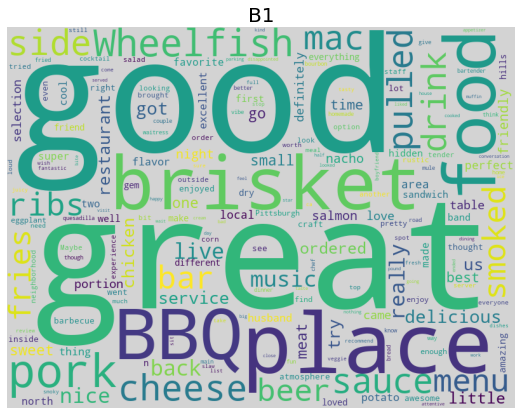

,word,count
0,good,85
1,great,79
2,place,70
3,brisket,58
4,food,53
5,bbq,53
6,pork,48
7,wheelfish,44
8,cheese,40
9,pulled,38


In [86]:
B1=random_business_id(dataset)
reviews_B1_text,reviews_B1_sentences,reviews_B1_tokens = business_review_extracter(dataset,B1)
sentences_appended_b1=append_tokens(reviews_B1_tokens)
show_wordclouds(sentences_appended_b1, "B1")
B1_freq_table=frequencyDistribution(sentences_appended_b1)
B1_freq_table[0:15]

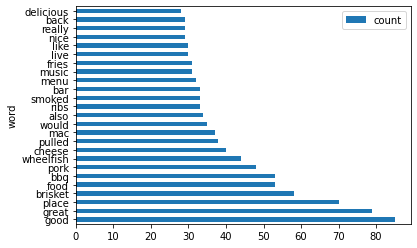

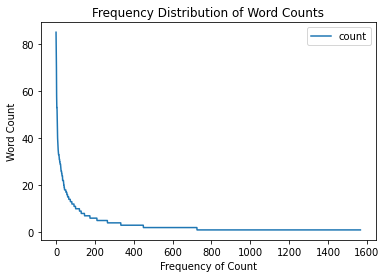

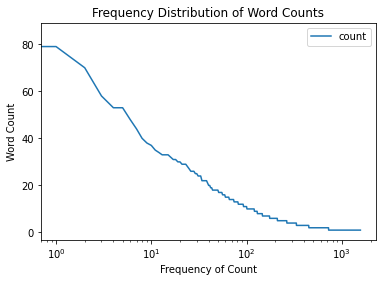

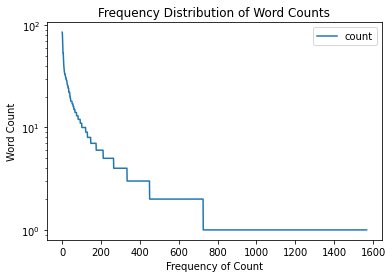

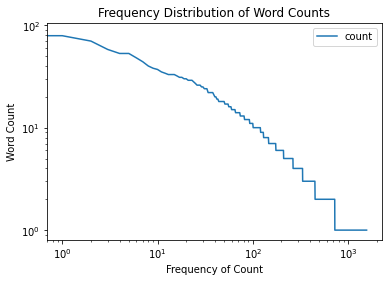

In [88]:
crudeCountPlot(B1_freq_table[0:25])
frequencyDistributionChart(B1_freq_table)
frequencyDistributionChart_logXTransformed(B1_freq_table)
frequencyDistributionChart_logYTransformed(B1_freq_table)
frequencyDistributionChart_loglogTransformed(B1_freq_table)

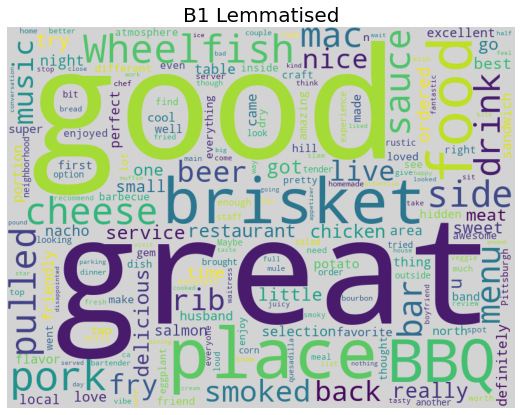

,word,count
0,good,85
1,great,79
2,place,73
3,brisket,58
4,food,54
5,bbq,53
6,pork,48
7,wheelfish,44
8,cheese,40
9,side,39


In [89]:
Porter_Stemming_B1=business_poter(reviews_B1_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B1_sentences)
Wordnet_lematization_B1=business_wordnet(reviews_B1_sentences)
#display word frequency distribution here
## I've just displayed for Wordnet_lemmatization, can just change Params
lemmatised_sentences_appended_b1=append_tokens(Wordnet_lematization_B1)
show_wordclouds(lemmatised_sentences_appended_b1, "B1 Lemmatised")
lemma_B1_freq_table=frequencyDistribution(lemmatised_sentences_appended_b1)
lemma_B1_freq_table[0:15]

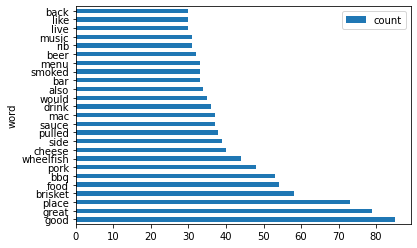

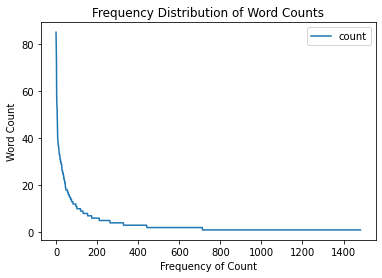

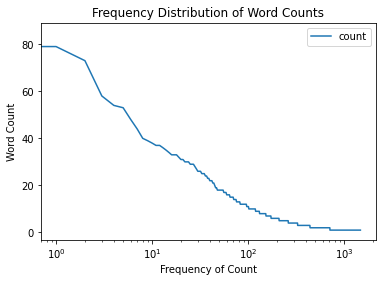

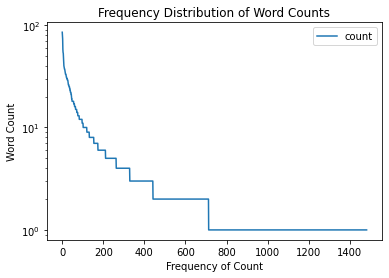

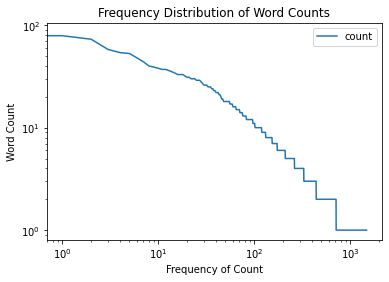

In [90]:
crudeCountPlot(lemma_B1_freq_table[0:25])
frequencyDistributionChart(lemma_B1_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B1_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B1_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B1_freq_table)

#### B2

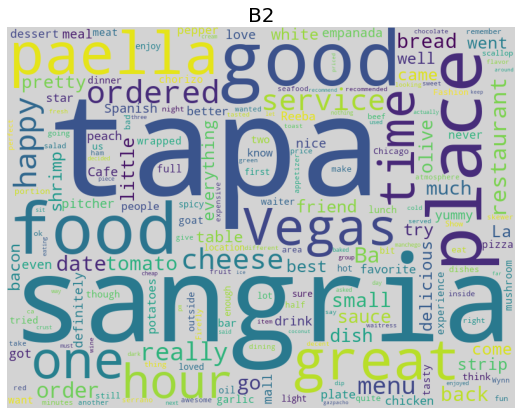

,word,count
0,tapas,122
1,good,92
2,sangria,87
3,place,80
4,food,77
5,great,64
6,paella,63
7,one,53
8,vegas,53
9,ordered,47


In [91]:
B2=random_business_id(dataset)
while(B1==B2):
    B2=random_business_id(dataset)
reviews_B2_text,reviews_B2_sentences,reviews_B2_tokens = business_review_extracter(dataset,B2)
#display word frequency distribution here
sentences_appended_b2=append_tokens(reviews_B2_tokens)
show_wordclouds(sentences_appended_b2, "B2")
B2_freq_table=frequencyDistribution(sentences_appended_b2)
B2_freq_table[0:15]

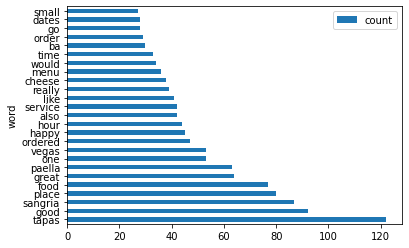

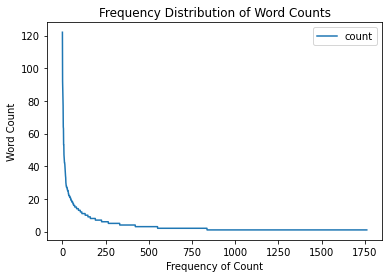

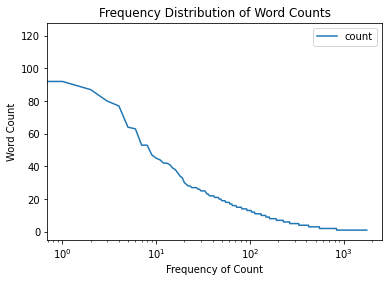

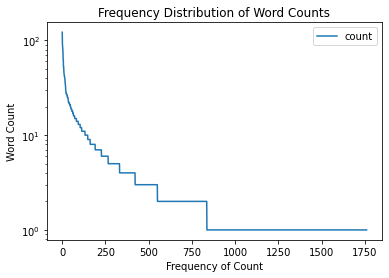

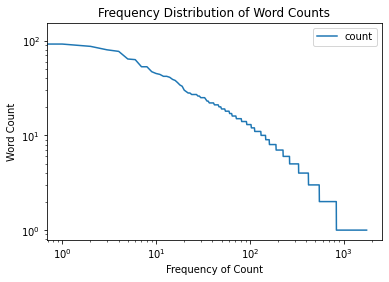

In [92]:
crudeCountPlot(B2_freq_table[0:25])
frequencyDistributionChart(B2_freq_table)
frequencyDistributionChart_logXTransformed(B2_freq_table)
frequencyDistributionChart_logYTransformed(B2_freq_table)
frequencyDistributionChart_loglogTransformed(B2_freq_table)

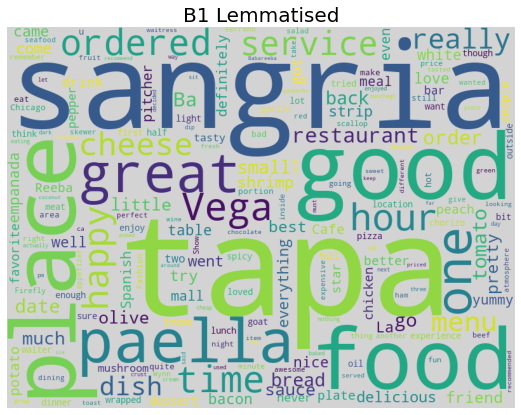

,word,count
0,tapa,112
1,sangria,93
2,good,92
3,place,88
4,food,77
5,paella,64
6,great,64
7,one,55
8,vegas,51
9,hour,49


In [93]:
Porter_Stemming_B1=business_poter(reviews_B2_sentences)
Lancaster_Stemming_B1=business_lancaster(reviews_B2_sentences)
Wordnet_lematization_B2=business_wordnet(reviews_B2_sentences)
#display word frequency distribution here

lemmatised_sentences_appended_b2=append_tokens(Wordnet_lematization_B2)
show_wordclouds(lemmatised_sentences_appended_b2, "B1 Lemmatised")
lemma_B2_freq_table=frequencyDistribution(lemmatised_sentences_appended_b2)
lemma_B2_freq_table[0:15]

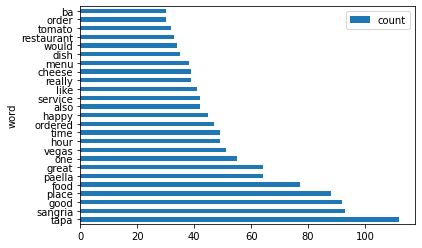

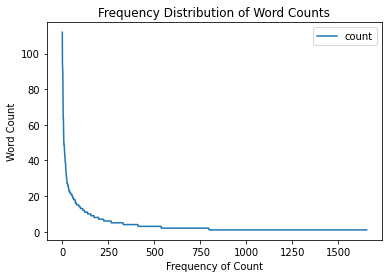

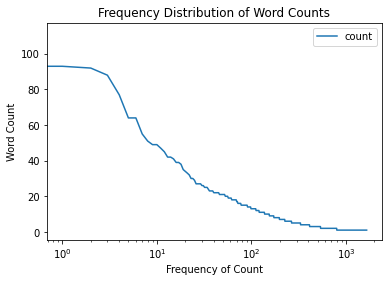

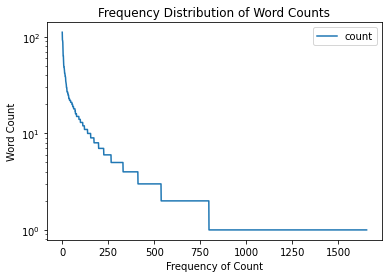

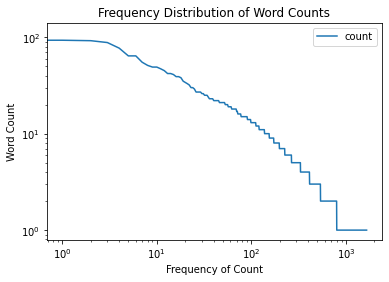

In [94]:
crudeCountPlot(lemma_B2_freq_table[0:25])
frequencyDistributionChart(lemma_B2_freq_table)
frequencyDistributionChart_logXTransformed(lemma_B2_freq_table)
frequencyDistributionChart_logYTransformed(lemma_B2_freq_table)
frequencyDistributionChart_loglogTransformed(lemma_B2_freq_table)

### b) POS Tagging

In [97]:
n=random.sample(range(0, len(dataset.text)), 5)
target=[]
reviews_tokens=[]
reviews_sentences=[]
required_sentences=[]
for i in range(0,5):
    target.append(dataset.text[n[i]])
    reviews_sentences.append(nltk.tokenize.sent_tokenize(target[i]))
for i in range(0,5):
    required_sentences.append(reviews_sentences[i][0])
print(required_sentences)
for i in range(0,len(required_sentences)):
    required_sentences[i]=nltk_pos_tagging(required_sentences[i])
print(required_sentences)

['Went here on a whim with a friend today and will.definitely go again.', 'On Q have amazing people on board.', 'Beer selection fantastic.', 'I like this small dog bar.', 'Such a kind compassionate doctor and service.']
[[('Went', 'NNP'), ('whim', 'NN'), ('friend', 'NN'), ('today', 'NN'), ('go', 'VBP')], [('Q', 'NNP'), ('amazing', 'VBG'), ('people', 'NNS'), ('board', 'NN')], [('Beer', 'NNP'), ('selection', 'NN'), ('fantastic', 'NN')], [('like', 'IN'), ('small', 'JJ'), ('dog', 'NN'), ('bar', 'NN')], [('kind', 'NN'), ('compassionate', 'NN'), ('doctor', 'NN'), ('service', 'NN')]]


In [98]:
# n=random.sample(range(0, len(dataset.text)), 5)
target=[]
reviews_tokens=[]
reviews_sentences=[]
required_sentences=[]
for i in range(0,5):
    target.append(dataset.text[n[i]])
    reviews_sentences.append(nltk.tokenize.sent_tokenize(target[i]))
for i in range(0,5):
    required_sentences.append(reviews_sentences[i][0])
print(required_sentences)
for i in range(0,len(required_sentences)):
    required_sentences[i]=spacy_pos_tagger(required_sentences[i])
print(required_sentences)

['Went here on a whim with a friend today and will.definitely go again.', 'On Q have amazing people on board.', 'Beer selection fantastic.', 'I like this small dog bar.', 'Such a kind compassionate doctor and service.']
Went         VERB       VBD      verb, past tense
here         ADV        RB       adverb
on           ADP        IN       conjunction, subordinating or preposition
a            DET        DT       determiner
whim         NOUN       NN       noun, singular or mass
with         ADP        IN       conjunction, subordinating or preposition
a            DET        DT       determiner
friend       NOUN       NN       noun, singular or mass
today        NOUN       NN       noun, singular or mass
and          CCONJ      CC       conjunction, coordinating
will.definitely ADV        RB       adverb
go           VERB       VB       verb, base form
again        ADV        RB       adverb
.            PUNCT      .        punctuation mark, sentence closer
On           ADP        IN

## 3.2b)

### Implementation To Get Noun-Adjective Pairs From 50 Random Reviews Rated 1 

In [30]:
data_rating_1 = data[data['stars']==1]
data_random_new = data_rating_1.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_50_rating_1 = data_random_new.sample(50)
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14


In [31]:
data_random_50_rating_1.shape

(50, 9)

In [32]:
data_random_50_rating_1['pos_tags'] = data_random_50_rating_1.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)

In [33]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ..."
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN..."
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB..."
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete..."
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V..."


In [34]:
data_random_50_rating_1['text_sentiment'] = data_random_50_rating_1.apply(lambda row: get_text_sentiment(row['text']), axis=1)

In [35]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ...",-0.285476
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN...",0.112774
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB...",0.239927
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete...",0.103519
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V...",0.051667


In [36]:
data_random_50_rating_1['sentence tokenizer'] = data_random_50_rating_1.apply(lambda row: sentence_tokenizer(row['text']),axis=1)

In [37]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ...",-0.285476,"[After recieving a dirty coffee cup , the owne..."
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN...",0.112774,"[Incompetent., We took our leased vehicle back..."
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB...",0.239927,"[Seriously over-rated., We were ushered in and..."
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete...",0.103519,"[Don't go here!, The sales guys are complete s..."
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V...",0.051667,[This is total BS AND I would know as I am wel...


In [38]:
data_random_50_rating_1["sentence_tokens_pos_tags"] = data_random_50_rating_1.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)

In [39]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ...",-0.285476,"[After recieving a dirty coffee cup , the owne...","[[(recieving, VBG), (dirty, JJ), (coffee, NN),..."
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN...",0.112774,"[Incompetent., We took our leased vehicle back...","[[(Incompetent, NN)], [(took, VBD), (leased, V..."
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB...",0.239927,"[Seriously over-rated., We were ushered in and...","[[(Seriously, RB)], [(ushered, JJ), (informed,..."
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete...",0.103519,"[Don't go here!, The sales guys are complete s...","[[(go, VB)], [(sales, NNS), (guys, NNS), (comp..."
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V...",0.051667,[This is total BS AND I would know as I am wel...,"[[(total, JJ), (BS, NNP), (would, MD), (know, ..."


In [40]:
data_random_50_rating_1['sentences_sentiment'] = data_random_50_rating_1.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)

In [41]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ...",-0.285476,"[After recieving a dirty coffee cup , the owne...","[[(recieving, VBG), (dirty, JJ), (coffee, NN),...","[-0.36083333333333334, 0.16666666666666666]"
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN...",0.112774,"[Incompetent., We took our leased vehicle back...","[[(Incompetent, NN)], [(took, VBD), (leased, V...","[-0.35, 0.06818181818181818, 1.0, -0.066666666..."
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB...",0.239927,"[Seriously over-rated., We were ushered in and...","[[(Seriously, RB)], [(ushered, JJ), (informed,...","[-0.3333333333333333, 0.0, 0.8, 0.0, 0.25, 0.3..."
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete...",0.103519,"[Don't go here!, The sales guys are complete s...","[[(go, VB)], [(sales, NNS), (guys, NNS), (comp...","[0.0, 0.125, -0.35, 0.24444444444444446, 0.0, ..."
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V...",0.051667,[This is total BS AND I would know as I am wel...,"[[(total, JJ), (BS, NNP), (would, MD), (know, ...","[0.0, -0.19999999999999998, 0.5, 0.5, 0.416666..."


In [63]:
data_random_50_rating_1.iloc[0]['sentence_tokens_pos_tags'][1][0][1]

'NN'

In [78]:
data_random_50_rating_1["noun_adjective_pairs"] = data_random_50_rating_1.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)

In [79]:
data_random_50_rating_1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
53,fnphinmkWC9MDJVO-t8KWA,CZxTyU7RJSybqjCCtO970w,QqGMtc24VdCzYAajw1g4bA,1,3,1,0,"After recieving a dirty coffee cup , the owner...",2015-08-02 16:57:52,"[(recieving, VBG), (dirty, JJ), (coffee, NN), ...",-0.285476,"[After recieving a dirty coffee cup , the owne...","[[(recieving, VBG), (dirty, JJ), (coffee, NN),...","[-0.36083333333333334, 0.16666666666666666]","[[[['coffee', 'dirty'], ['cup', 'dirty'], ['ma..."
61,ZNByFATUX9xhp18cMs9Qig,2yGQ2zhdHMPUzt72p1g1MA,TbkyrVi1b90cZS-rUtnvHA,1,1,0,0,Incompetent. \r\n\r\nWe took our leased vehicl...,2018-07-03 01:37:17,"[(Incompetent, NNP), (took, VBD), (leased, VBN...",0.112774,"[Incompetent., We took our leased vehicle back...","[[(Incompetent, NN)], [(took, VBD), (leased, V...","[-0.35, 0.06818181818181818, 1.0, -0.066666666...","[[[], 0, -0.35], [[['vehicle', 'new'], ['locat..."
5,IPksSeUIbbdHeVRxOt2Wzw,IJABCqLsGgT8DxqujUQmiA,2ALnrUa1_U8JHNgscad8OQ,1,0,1,0,Seriously over-rated. \r\n\r\nWe were ushered ...,2008-01-23 18:35:09,"[(Seriously, RB), (ushered, JJ), (informed, VB...",0.239927,"[Seriously over-rated., We were ushered in and...","[[(Seriously, RB)], [(ushered, JJ), (informed,...","[-0.3333333333333333, 0.0, 0.8, 0.0, 0.25, 0.3...","[[[], 0, -0.3333333333333333], [[['charge', 'c..."
6,9prVlAFJOyt1BEh6bj9utw,A7n1N1cHdrGZRjM9df7MGg,2xrpo-LXV9uGIwpvy0dwUw,1,3,0,1,Don't go here! The sales guys are complete sli...,2013-10-04 20:54:57,"[(go, VB), (sales, NNS), (guys, RB), (complete...",0.103519,"[Don't go here!, The sales guys are complete s...","[[(go, VB)], [(sales, NNS), (guys, NNS), (comp...","[0.0, 0.125, -0.35, 0.24444444444444446, 0.0, ...","[[[], 0, 0.0], [[['guy', 'complete'], ['slime'..."
92,E33dZbqmqscMTKfUKnHVIw,O9GoYQxWPt74oQNngTbFPg,eWmARaQb_9vxq-zy5PVvXA,1,1,0,1,This is total BS AND I would know as I am well...,2017-08-31 03:11:14,"[(total, JJ), (BS, NNP), (would, MD), (know, V...",0.051667,[This is total BS AND I would know as I am wel...,"[[(total, JJ), (BS, NNP), (would, MD), (know, ...","[0.0, -0.19999999999999998, 0.5, 0.5, 0.416666...","[[[['bs', 'total'], ['eastern', 'alternative']..."


In [82]:
top_frequent = get_top_frequent_pairs_words(data_random_50_rating_1,10)

In [83]:
top_frequent[0]

[(('time', 'last'), 3),
 (('time', 'first'), 3),
 (('food', 'foreign'), 2),
 (('mazda', 'clear'), 2),
 (('sale', 'early'), 2),
 (('manager', 'early'), 2),
 (('phone', 'early'), 2),
 (('eat', 'french'), 2),
 (('lasagna', 'veal'), 2),
 (('place', 'last'), 2)]

In [468]:
top_frequent[1]

[-0.0625, 0.2890625, 0.3]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 2

In [380]:
data_rating_2 = data[data['stars']==2]
data_random_rating_2 = data_rating_2.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_2 = data_random_rating_2.sample(20)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21


In [381]:
data_random_20_rating_2.shape

(20, 9)

In [382]:
data_random_20_rating_2['pos_tags'] = data_random_20_rating_2.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri..."


In [383]:
data_random_20_rating_2['text_sentiment'] = data_random_20_rating_2.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762


In [384]:
data_random_20_rating_2['sentence tokenizer'] = data_random_20_rating_2.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...


In [385]:
data_random_20_rating_2["sentence_tokens_pos_tags"] = data_random_20_rating_2.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr..."


In [386]:
data_random_20_rating_2['sentences_sentiment'] = data_random_20_rating_2.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_2.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,...","[0.0, -1.0, 0.16666666666666666, 0.0, 0.0, -1...."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)...","[-0.16666666666666666, 0.0, 0.5, 0.64999999999..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi...","[0.35714285714285715, 0.8, 0.25, 0.0, 0.554999..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.4499999..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr...","[0.0, 0.0, 0.25, -0.32499999999999996, 0.26428..."


In [387]:
data_random_20_rating_2["noun_adjective_pairs"] = data_random_20_rating_2.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_2.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
118,8McGyeCGGeCxxN2yquebcg,KDeuURmWUuaj-kI2qIiO6w,rv9T1qGHbh9eXqFpKEPy_A,2,1,0,0,I visited here with my dad for lunch. Frankly...,2014-05-22 20:44:02,"[(I, PRP), (visited, VBD), (dad, NN), (lunch, ...",-0.177546,"[I visited here with my dad for lunch., Frankl...","[[(I, PRP), (visited, VBD), (dad, NN), (lunch,...","[0.0, -1.0, 0.16666666666666666, 0.0, 0.0, -1....","[[[], 0, 0.0], [[], 0, -1.0], [[['love', 'ta']..."
96,COoyov57xCewAp_KOHOpGw,f_TL1EP-qm3qMNm259PSJw,hXzoNgpkC86K_Jfg_zMHvA,2,0,0,0,Pho broth was bland. It was just eh. I have ha...,2018-06-27 19:36:05,"[(Pho, NNP), (broth, DT), (bland, NN), (., .),...",0.408333,"[Pho broth was bland., It was just eh., I have...","[[(Pho, NNP), (broth, DT), (bland, NN), (., .)...","[-0.16666666666666666, 0.0, 0.5, 0.64999999999...","[[[], 0, -0.16666666666666666], [[], 0, 0.0], ..."
7,2LxHqQ67UoQsXCZ7fZuTgw,vSeltqO5Yn08_wKDlnQqXw,3kUqNxO1rkDDb89GAfyNgw,2,3,0,0,I was given services here as a gift and was ho...,2015-02-20 22:12:14,"[(I, PRP), (given, VBN), (services, NNS), (gif...",0.159780,[I was given services here as a gift and was h...,"[[(I, PRP), (given, VBN), (services, NNS), (gi...","[0.35714285714285715, 0.8, 0.25, 0.0, 0.554999...","[[[['experience', 'special']], 1, 0.3571428571..."
82,ffZ9_l9faSEk-vDHkEnOZQ,aIXQsTXzuZQrJEoLMQLeZA,cOY6ipigtTXdcmmmiFiniA,2,1,0,0,"1st off, I do like this joint. Sunday brunch ...",2015-01-18 15:07:04,"[(1st, CD), (,, ,), (I, PRP), (like, VBP), (jo...",0.311111,"[1st off, I do like this joint., Sunday brunch...","[[(1st, CD), (,, ,), (I, PRP), (like, VBP), (j...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.4499999...","[[[], 0, 0.0], [[['area', 'brunch']], 1, 0.0],..."
109,SbdSZ9U8FrJzSZSPQhWxdw,h3q5I0_gH-cDICOsnT8wKQ,oICXzFAaUMrYGzjRWmkw4Q,2,0,2,0,I was told by a Vietnamese friend that this is...,2014-11-24 20:44:21,"[(I, PRP), (told, VBD), (Vietnamese, JJ), (fri...",0.078762,[I was told by a Vietnamese friend that this i...,"[[(I, PRP), (told, VBD), (Vietnamese, JJ), (fr...","[0.0, 0.0, 0.25, -0.32499999999999996, 0.26428...","[[[['friend', 'Vietnamese']], 1, 0.0], [[], 0,..."


In [454]:
top_frequent_rating_2 = get_top_frequent_pairs_words(data_random_20_rating_2,3)

In [455]:
top_frequent_rating_2[0]

[(('stone', 'hot'), 3), (('massage', 'hot'), 2), (('manicure', 'citrus'), 2)]

In [456]:
top_frequent_rating_2[1]

[0.15555555555555556, 0.09375, 0.18263888888888888]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 3 

In [391]:
data_rating_3 = data[data['stars']==3]
data_random_rating_3 = data_rating_3.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_3 = data_random_rating_3.sample(20)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23


In [392]:
data_random_20_rating_3.shape

(20, 9)

In [393]:
data_random_20_rating_3['pos_tags'] = data_random_20_rating_3.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N..."


In [394]:
data_random_20_rating_3['text_sentiment'] = data_random_20_rating_3.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548


In [395]:
data_random_20_rating_3['sentence tokenizer'] = data_random_20_rating_3.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th..."


In [396]:
data_random_20_rating_3["sentence_tokens_pos_tags"] = data_random_20_rating_3.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ..."


In [397]:
data_random_20_rating_3['sentences_sentiment'] = data_random_20_rating_3.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_3.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (...","[0.0, 0.0, 0.0, -0.06944444444444445, 0.0, 0.0..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS...","[-0.4, 0.15357142857142858, 0.7]"
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,...","[-0.16666666666666666, 0.25, 0.1, 0.1888888888..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ...","[0.3125, 0.25, 0.0, 0.5555555555555556, 0.3, 0..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ...","[0.3499999999999999, 0.0, 0.07142857142857142,..."


In [398]:
data_random_20_rating_3["noun_adjective_pairs"] = data_random_20_rating_3.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_3.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
24,h4ZAJUCA-KHQrk4-7cYCcw,-4JDJeFS0YAYSiSvIshGLQ,Cr066pnTj0ioEMZRTHgMOw,3,0,0,0,"Lunch: Beef & lamb shawarma. Comes with pita,...",2014-05-06 20:44:19,"[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (l...",0.059028,"[Lunch: Beef & lamb shawarma., Comes with pit...","[[(Lunch, NN), (:, :), (Beef, NNP), (&, CC), (...","[0.0, 0.0, 0.0, -0.06944444444444445, 0.0, 0.0...","[[[], 0, 0.0], [[], 0, 0.0], [[['wedge', 'lemo..."
8,Pq5G_aoKQDpgEVRzMJ4-8Q,0rDx6jQPc966EajmqmJlxA,4no7JcP4CYasqxdxmrTGRA,3,0,0,0,I came here over 10 times and it's a convenien...,2017-05-05 23:51:59,"[(I, PRP), (came, VBD), (10, CD), (times, NNS)...",0.152857,[I came here over 10 times and it's a convenie...,"[[(I, PRP), (came, VBD), (10, CD), (times, NNS...","[-0.4, 0.15357142857142858, 0.7]","[[[['place', 'convenient'], ['hang', 'convenie..."
117,04-tEvEj8YNoMOuTY5_3tg,FuSn5ZxN2NV_PpK03gwcsg,rv9T1qGHbh9eXqFpKEPy_A,3,3,2,1,"I told my daughter, let's just grab some pedes...",2014-05-04 21:16:51,"[(I, PRP), (told, VBD), (daughter, NN), (,, ,)...",0.105798,"[I told my daughter, let's just grab some pede...","[[(I, PRP), (told, VBD), (daughter, NN), (,, ,...","[-0.16666666666666666, 0.25, 0.1, 0.1888888888...","[[[['food', 'generic'], ['food', 'Chinese']], ..."
29,o6uwaQ2Sd_UM8l1tUaM3dA,mdZIzaBa7yXArDQPsGwPFw,IBYExgJ6jURNJOk_5uSrKg,3,0,0,0,I really want to like this place!! I really do...,2016-05-17 03:21:01,"[(I, PRP), (really, RB), (want, VBP), (like, J...",0.272917,"[I really want to like this place!!, I really ...","[[(I, PRP), (really, RB), (want, VBP), (like, ...","[0.3125, 0.25, 0.0, 0.5555555555555556, 0.3, 0...","[[[['place', 'like']], 1, 0.3125], [[], 0, 0.2..."
102,yykZRoNnGqFFW5Ob16aKxg,cFpgPyVwEt2v3ltwU3tuGg,l07ctcrDMV--TYwe3uzebQ,3,0,0,0,Not a bad place for Korean food. Although thei...,2015-03-25 18:06:23,"[(Not, RB), (bad, JJ), (place, NN), (Korean, N...",0.219548,"[Not a bad place for Korean food., Although th...","[[(Not, RB), (bad, JJ), (place, NN), (Korean, ...","[0.3499999999999999, 0.0, 0.07142857142857142,...","[[[['place', 'bad']], 1, 0.3499999999999999], ..."


In [457]:
top_frequent_rating_3 = get_top_frequent_pairs_words(data_random_20_rating_3,3)

In [458]:
top_frequent_rating_3[0]

[(('food', 'Chinese'), 2), (('manicure', 'gel'), 2), (('pot', 'hot'), 2)]

In [459]:
top_frequent_rating_3[1]

[-0.08333333333333333, -0.25, -0.05625]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 4 

In [402]:
data_rating_4 = data[data['stars']==4]
data_random_rating_4 = data_rating_4.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_4 = data_random_rating_4.sample(20)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35


In [403]:
data_random_20_rating_4.shape

(20, 9)

In [404]:
data_random_20_rating_4['pos_tags'] = data_random_20_rating_4.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P..."


In [405]:
data_random_20_rating_4['text_sentiment'] = data_random_20_rating_4.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167


In [406]:
data_random_20_rating_4['sentence tokenizer'] = data_random_20_rating_4.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy..."


In [407]:
data_random_20_rating_4["sentence_tokens_pos_tags"] = data_random_20_rating_4.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ..."


In [408]:
data_random_20_rating_4['sentences_sentiment'] = data_random_20_rating_4.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_4.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ...","[0.0, 0.6, 0.0, 0.8, 0.35, 0.175, 0.8, 0.33333..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ...","[0.18333333333333335, 0.0, 0.5, 0.8, -0.5, 0.6..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,...","[0.5416666666666666, 0.4, 0.65, 0.0]"
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N...","[-0.390625, 0.0, 0.3666666666666667, 0.125, 0...."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ...","[0.0, 0.1875, 0.0, 0.0, 0.1111111111111111, -0..."


In [409]:
data_random_20_rating_4["noun_adjective_pairs"] = data_random_20_rating_4.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_4.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
39,gXGPy44SFSFNeWK5dFw5GQ,Iov4kDL9SAQhcBLGwCLY_A,JqBtQ1bSynPHE9gbyuSSvA,4,1,0,0,This is a bit like Johnny Rockets ( with 50's ...,2010-12-12 22:56:36,"[(This, DT), (bit, NN), (like, IN), (Johnny, N...",0.410119,[This is a bit like Johnny Rockets ( with 50's...,"[[(This, DT), (bit, NN), (like, IN), (Johnny, ...","[0.0, 0.6, 0.0, 0.8, 0.35, 0.175, 0.8, 0.33333...","[[[], 0, 0.0], [[], 0, 0.6], [[], 0, 0.0], [[[..."
94,9EiwuClG20gekQsIj7UkGg,MWsNiRtB8R4HdSD8vymi_g,grvkjaJB9aorAMIjGD6XSg,4,0,0,1,"Clean, simple, no nonsense, no upselling. Owne...",2016-05-18 15:24:36,"[(Clean, NNP), (,, ,), (simple, NN), (,, ,), (...",0.220833,"[Clean, simple, no nonsense, no upselling., Ow...","[[(Clean, NNP), (,, ,), (simple, NN), (,, ,), ...","[0.18333333333333335, 0.0, 0.5, 0.8, -0.5, 0.6...","[[[], 0, 0.18333333333333335], [[['look', 'hon..."
64,3c1ktOLQ-IWpq2L4z-5_-w,HArXI9qe6RgGpS7oLv4b_g,UDiMCb4LKowlozI5mhtO_A,4,0,0,0,Love love love this place! Santa fe spring rol...,2015-02-19 16:15:00,"[(Love, NNP), (love, NN), (love, NN), (place, ...",0.475000,"[Love love love this place!, Santa fe spring r...","[[(Love, NNP), (love, NN), (love, NN), (place,...","[0.5416666666666666, 0.4, 0.65, 0.0]","[[[], 0, 0.5416666666666666], [[['option', 'gi..."
143,RTpEekjxqgTML4FBfd6mOg,lmxp3ZtAcU7afMm_JrSfww,yAkaDc6MWX3dy8bnEcCrRQ,4,1,1,0,Finally a chinese restaurant in Madison that d...,2018-07-13 17:20:55,"[(Finally, RB), (chinese, JJ), (restaurant, NN...",0.115660,[Finally a chinese restaurant in Madison that ...,"[[(Finally, RB), (chinese, JJ), (restaurant, N...","[-0.390625, 0.0, 0.3666666666666667, 0.125, 0....","[[[['restaurant', 'chinese']], 1, -0.390625], ..."
80,yoHyUO3Q3eZWoCyQxQ0p2Q,5jWaMozd4Ffi9YGwCC3QQw,c0t81YxNqZQuTJrTfn3QYA,4,1,0,1,Came in about 1:30 PM. Place was pretty busy c...,2017-03-13 22:16:35,"[(Came, NN), (1:30, CD), (PM, NNP), (., .), (P...",0.279167,"[Came in about 1:30 PM., Place was pretty busy...","[[(Came, NN), (1:30, CD), (PM, NNP), (., .)], ...","[0.0, 0.1875, 0.0, 0.0, 0.1111111111111111, -0...","[[[], 0, 0.0], [[], 0, 0.1875], [[], 0, 0.0], ..."


In [460]:
top_frequent_rating_4 = get_top_frequent_pairs_words(data_random_20_rating_4,3)

In [461]:
top_frequent_rating_4[0]

[(('yogurt', 'frozen'), 3), (('shine', 'buff'), 2), (('gyro', 'regular'), 2)]

In [462]:
top_frequent_rating_4[1]

[0.1676851851851852, 0.01944444444444446, 0.0]

### Implementation To Get Noun-Adjective Pairs From 20 Random Reviews Rated 5 

In [413]:
data_rating_5 = data[data['stars']==5]
data_random_rating_5 = data_rating_5.groupby('business_id').apply(lambda x: x.sample(1)).reset_index(drop=True)
data_random_20_rating_5 = data_random_rating_5.sample(20)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29


In [414]:
data_random_20_rating_5.shape

(20, 9)

In [415]:
data_random_20_rating_5['pos_tags'] = data_random_20_rating_5.apply(lambda row: nltk_pos_tagging(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ..."


In [416]:
data_random_20_rating_5['text_sentiment'] = data_random_20_rating_5.apply(lambda row: get_text_sentiment(row['text']), axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000


In [417]:
data_random_20_rating_5['sentence tokenizer'] = data_random_20_rating_5.apply(lambda row: sentence_tokenizer(row['text']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...


In [418]:
data_random_20_rating_5["sentence_tokens_pos_tags"] = data_random_20_rating_5.apply(lambda row: tokenize_sentences(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J..."


In [419]:
data_random_20_rating_5['sentences_sentiment'] = data_random_20_rating_5.apply(lambda row: get_sentence_sentiment(row['sentence tokenizer']),axis=1)
data_random_20_rating_5.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)...","[0.4, -0.26666666666666666, 1.0, 0.5, 0.281565..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB...","[1.0, 0.9375, 1.0]"
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It...","[0.6, 0.4000000000000001, -0.0125, 0.0, 0.0, 0..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol...","[0.0, -0.07142857142857142, 0.0, 0.2, -0.3, 0...."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J...","[0.35, 0.39999999999999997, 0.0, 0.0]"


In [420]:
data_random_20_rating_5["noun_adjective_pairs"] = data_random_20_rating_5.apply(lambda row: count_noun_adjective_pairs(row['sentence_tokens_pos_tags'],row['sentences_sentiment']),axis=1)
data_random_20_rating_5.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,pos_tags,text_sentiment,sentence tokenizer,sentence_tokens_pos_tags,sentences_sentiment,noun_adjective_pairs
59,MOM0iybpdfp1wyMVJu7zuQ,omYwcPuRlMLxzOyDMsRKTQ,R4R7ttLXfKKWM0VEMoaW4w,5,0,0,0,As a big fan of frozen yogurt when moving from...,2018-06-27 22:09:55,"[(As, IN), (big, JJ), (fan, NN), (frozen, JJ),...",0.225313,[As a big fan of frozen yogurt when moving fro...,"[[(As, IN), (big, JJ), (fan, NN), (frozen, JJ)...","[0.4, -0.26666666666666666, 1.0, 0.5, 0.281565...","[[[['fan', 'big'], ['yogurt', 'frozen'], ['pla..."
35,pUCfJ8HbmQrfxiob4p53zQ,ZLI8latHM_OwudCABkQEBg,IeK0nzbMPbWnUBIPB83v6A,5,1,0,2,Every time we are in town we go and have a gre...,2014-02-13 21:39:04,"[(Every, DT), (time, NN), (town, NN), (go, VB)...",0.968750,[Every time we are in town we go and have a gr...,"[[(Every, DT), (time, NN), (town, NN), (go, VB...","[1.0, 0.9375, 1.0]","[[[['time', 'great']], 1, 1.0], [[], 0, 0.9375..."
8,4jwW1LxZdcBdVU6z_xjy4Q,L0gnnLGy0uLIoUFH8KXILQ,4no7JcP4CYasqxdxmrTGRA,5,0,0,0,Nice atmosphere. It's a huge place when you wa...,2016-09-23 21:35:39,"[(Nice, NNP), (atmosphere, RB), (., .), (It, P...",0.300000,"[Nice atmosphere., It's a huge place when you ...","[[(Nice, NNP), (atmosphere, RB), (., .)], [(It...","[0.6, 0.4000000000000001, -0.0125, 0.0, 0.0, 0...","[[[], 0, 0.6], [[['place', 'huge'], ['walk', '..."
23,pz4CBoz93BCs-UwGuBDPIg,Gh5hU5_WG1qV_IxLVvSRxQ,CQxhyLM833WF45yrS9yeAA,5,2,0,0,"Today, we had to put our 17-year-old miracle c...",2018-02-27 05:43:36,"[(Today, NN), (,, ,), (put, VBD), (17-year-old...",0.251944,"[Today, we had to put our 17-year-old miracle ...","[[(Today, NN), (,, ,), (put, VBD), (17-year-ol...","[0.0, -0.07142857142857142, 0.0, 0.2, -0.3, 0....","[[[['miracle', '17-year-old'], ['cat', '17-yea..."
131,W3DEl0_jP44RaSVShVMKtw,ynbE5CmK1oqOEKfdi-JirQ,uhyDNWYRSsom3VrFgOgP_w,5,0,0,0,I can not say enough good things about greka p...,2014-12-15 18:23:29,"[(I, PRP), (say, VBP), (enough, RB), (good, JJ...",0.380000,[I can not say enough good things about greka ...,"[[(I, PRP), (say, VBP), (enough, RB), (good, J...","[0.35, 0.39999999999999997, 0.0, 0.0]","[[[], 0, 0.35], [[['good', 'greek']], 1, 0.399..."


In [463]:
top_frequent_rating_5 = get_top_frequent_pairs_words(data_random_20_rating_5,3)

In [464]:
top_frequent_rating_5[0]

[(('restaurant', 'Vietnamese'), 2),
 (('charge', 'free'), 2),
 (('fan', 'big'), 1)]

In [465]:
top_frequent_rating_5[1]

[0.30000000000000004, 0.3141666666666667, 0.45]

### Probable Drawbacks From This Method. 

In [424]:
all_noun_adjective_pairs_rating = []
all_noun_adjective_pairs_sentiments = []
data_random_50_rating_1.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_1_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_2.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_2_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_3.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_3_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_4.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_4_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)

all_noun_adjective_pairs_rating = []
data_random_20_rating_5.apply(lambda row: extract_all_noun_adjective_pairs(row['noun_adjective_pairs'],all_noun_adjective_pairs_rating,all_noun_adjective_pairs_sentiments),axis=1)
all_noun_adjective_pairs__rating_5_tuple = convert_list_to_tuple(all_noun_adjective_pairs_rating)


In [425]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'great') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('food', 'good') . The count from from each of the tuples are:  [4, 1] .
The common element is  ('day', 'next') . The count from from each of the tuples are:  [1, 1] .


In [426]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_4_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .


In [427]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_1_tuple,all_noun_adjective_pairs__rating_3_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('service', 'overall') . The count from from each of the tuples are:  [1, 1] .


In [428]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_2_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('food', 'good') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('experience', 'great') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('day', 'next') . The count from from each of the tuples are:  [2, 1] .


In [429]:
get_count_and_common_word_pairs(all_noun_adjective_pairs__rating_3_tuple,all_noun_adjective_pairs__rating_5_tuple)

The common element is  ('fan', 'big') . The count from from each of the tuples are:  [1, 1] .
The common element is  ('group', 'large') . The count from from each of the tuples are:  [1, 1] .


### Bar Plots for most Frequent Word Pairs

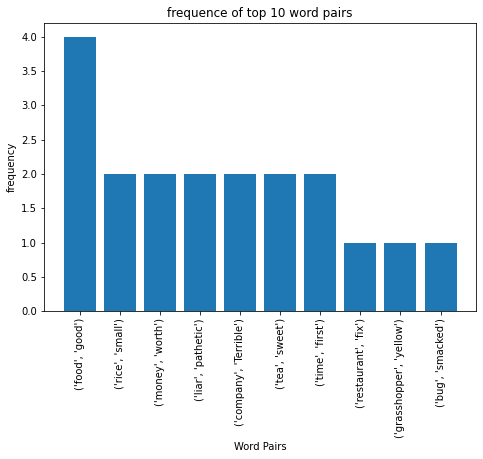

In [430]:
barplot_for_the_frequent_word_pairs(data_random_50_rating_1,10)

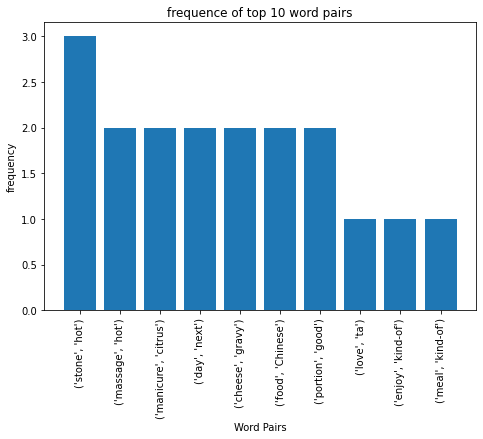

In [431]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_2,10)

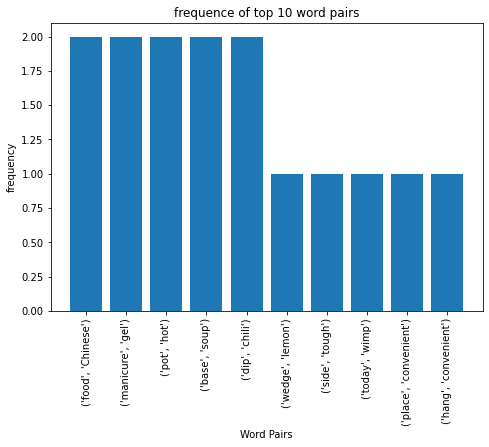

In [432]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_3,10)

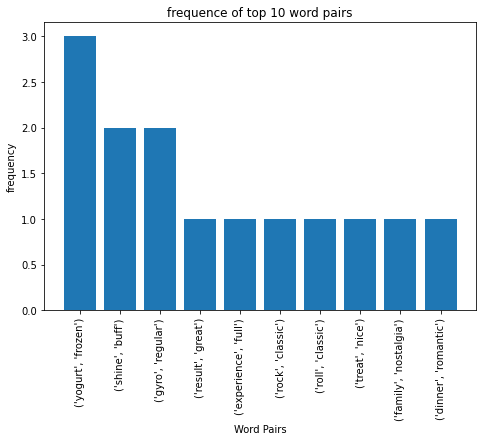

In [433]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_4,10)

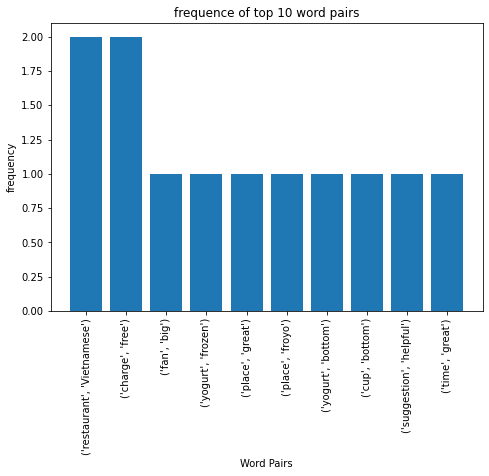

In [434]:
barplot_for_the_frequent_word_pairs(data_random_20_rating_5,10)

### Wordclouds For Data Being Used For Each User Rating. 

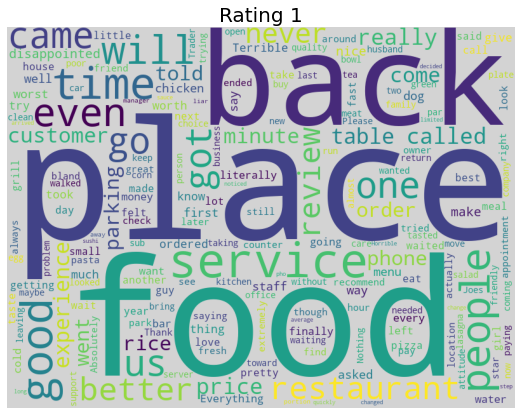

In [435]:
show_wordclouds(data_random_50_rating_1,"Rating 1")

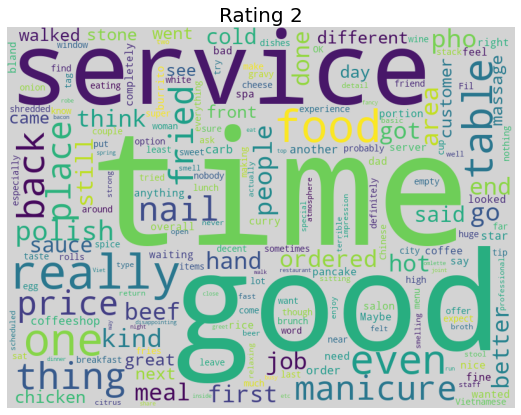

In [436]:
show_wordclouds(data_random_20_rating_2,"Rating 2")

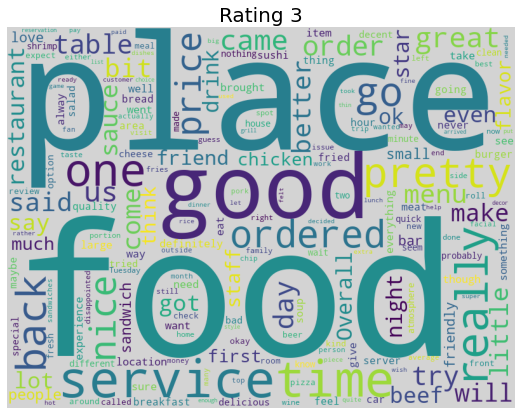

In [437]:
show_wordclouds(data_random_rating_3,"Rating 3")

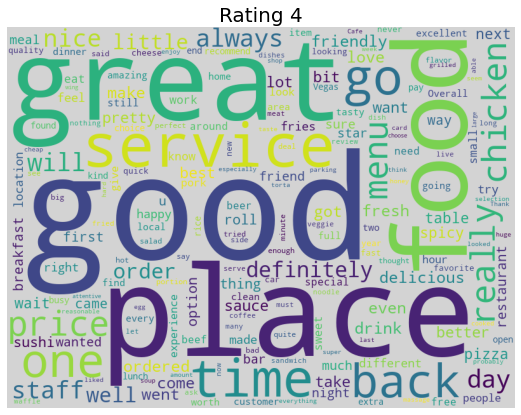

In [438]:
show_wordclouds(data_random_rating_4,"Rating 4")

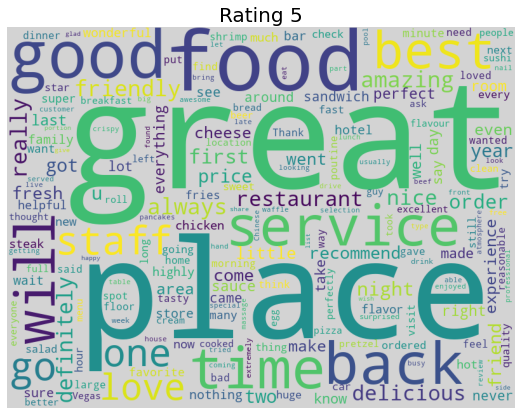

In [439]:
show_wordclouds(data_random_rating_5,"Rating 5")

## 3.3 Indicative Adjective Phrases

In [59]:

business_ids= read_business_ids_from_file()
business_b1_id= random_business_id(data)
print(business_b1_id)
business_adjps=[]
bp=load_adjective_phrases()
for i in range(len(business_ids)):
    if business_b1_id==business_ids[i]:
        business_b1=bp[i]
    else:
        business_adjps.append(bp[i])


aDHD7nASfqiQBB6YXy2aGA


['delicious', 'cheap', 'warm', 'so cheap', 'delicious .', 'worth', 'wrong with the pretzel shop', 'worth it and prices are cheap', 'wonderfully extra', 'wonderful -- very chewy , savory , and delicious', 'wild', 'way too early', 'way better than the ones from the mall that are dripping in butter', 'warm - so good', 'warm , fresh ,', 'very reasonable from what i remember', 'very inexpensive , much less pricey than the typical " auntie annes " inside malls', 'unbeatable in the southside area', 'truly enough', 'tough to walk by and not pick up some pretzels to take home', 'topped with a mess of goodness', 'too like', 'toddler - approved', 'then fresh out of the oven', 'tasty either hot or cold', 'tasty and full', 'tasty 20', 'taste', 'sweet but not too sweet', "sure you take cash since they do n't take credit / debit cards", 'sure you grab one', 'sure to try the back entrance for a hot baked pretzel', 'sure to tell them " light salt "', 'sure to stop here', 'sure to get some pretzels afte

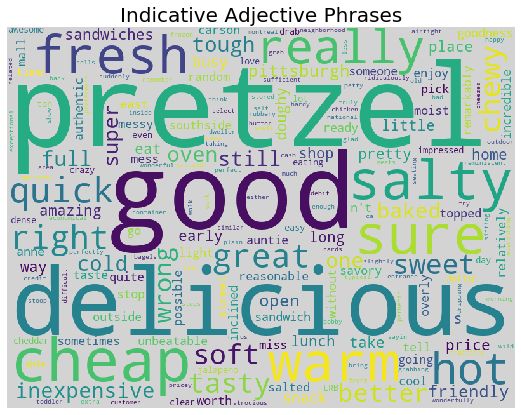

In [60]:
#using relative entropy
indicative_adjective_phrases=relative_entropy(business_b1,business_adjps)
print(indicative_adjective_phrases)
indicative_adjective_phrases=pd.DataFrame(indicative_adjective_phrases)
indicative_adjective_phrases.columns=['text']
show_wordclouds(indicative_adjective_phrases,"Indicative Adjective Phrases")


['ridiculous', 'too much', 'rubbery , cold , and difficult', 'so cool', 'really good', 'great too', 'life - long', 'impressed with the variety and price', 'tasty', 'so glad we had someone show us this place', 'wonderful', 'way too early', 'open till at least 7 pm - preferably midnight', 'out of luck', 'inexpensive .', 'great for a quick snack mid day .', 'tiny', 'so good', 'pretty good , not exceptional as they had been sitting there for a while', 'warm', 'greasy', 'disappointing', 'very salty', 'as good', 'unbeatable in the southside area', 'amazing', 'plain', 'delicious .', 'worth it and prices are cheap', 'cheap', 'slightly tough on the outside', 'delicious', 'simple', 'reminiscent of the neighborhood', 'a little strange', 'wonderfully extra', 'all different', 'alright', 'inclined to enjoy a pretzel by itself rather than topped with a mess of goodness', 'inclined to enjoy a pretzel by itself', 'topped with a mess of goodness', 'dirt cheap', 'adventurous', 'completely surprised by th

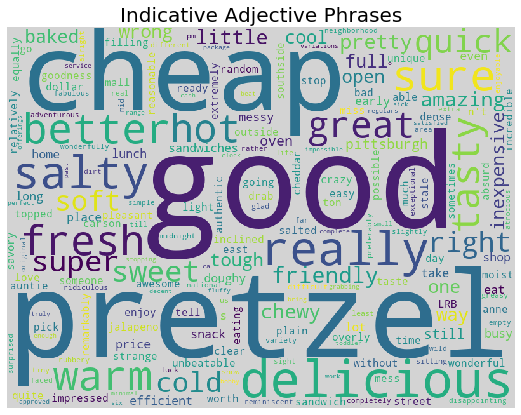

In [61]:
#using counting and probability
indicative_adjective_phrases=counting_and_probability(business_b1,business_adjps)
print(indicative_adjective_phrases)
indicative_adjective_phrases=pd.DataFrame(indicative_adjective_phrases)
indicative_adjective_phrases.columns=['text']
show_wordclouds(indicative_adjective_phrases,"Indicative Adjective Phrases")